<a href="https://colab.research.google.com/github/itzaamer/Airplane-Accident-Severity---Case-study--1/blob/main/Airplane_Acc_Severity_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




<p style="font-size:36px;text-align:center"> <b>Airplane Accident Severity – Analysis & Prediction</b> </p>

<h1>1. Business Problem</h1>

<h2>1.1. Description</h2>

How severe can an airplane accident be? Flying has been the go-to mode of travel for years now; it is timesaving, affordable, and extremely convenient. According to the FAA, 2,781,971 passengers fly every day in the US, as in June 2019. Passengers reckon that flying is very safe, considering strict inspections are conducted and security measures are taken to avoid and/or mitigate any mishappenings. However, there remain a few chances of unfortunate incidents.

Imagine we got a project from leading airline. They give us task to predict the severity by building the Best Machine Learning model based on the past data. With this, all airlines, even the entire aviation industry, can predict the severity of airplane accidents caused due to various factors and, correspondingly, have a plan of action to minimize the risk associated with them.
So, the purpose of this self-case study was to determine the model that best predicts the target variable and determine the variables that are most important within the model, and classify the severity of the accident like (Minor_Damage_And_Injuries, Significant_Damage_And_Fatalities, etc.)

<h2>1.2. Source/Useful Links</h2>

Some articles and reference blogs and paper about the problem statement.
- https://medium.com/analytics-vidhya/the-severity-of-airplane-accidents-305136e495b8
- Predicting General Aviation Accidents Using Machine Learning Algorithms Bradley S. Baugh
- Aviation Accident Analysis: A Case Study M. Shahriari (✉) and M.E. Aydin 
- This dataset provided by Microsoft contains about airplane accident.
- Source: https://www.kaggle.com/abilashcheruvathur/airplane-accident-severity-analysis-prediction 
- https://www.youtube.com/watch?v=XI0619WGa_o

<h2>1.3. Real-world/Business objectives and constraints.</h2>

-  Interpretability is important. 
- Minimize multi-class error. 
- No strict latency concerns. 
- Incorrect classification impact on the analysis.

<h1>2. Machine Learning Problem Formulation</h1>

<h2>2.1. Data</h2>

<h3>2.1.1. Data Overview</h3>

- Source: https://www.kaggle.com/abilashcheruvathur/airplane-accident-severity-analysis-prediction.
- <p> 
    Data file's information:
    <ul> 
        <li>
        Train.csv (AccidentID ,SafetyScore,severity,days since inspection,total safety somplaint,turbulance gforce,accident type code,control metric,adverse weather metric,violations,max elevations,cabin temprature)
        </li>
        <li>
        Test.csv (AccidentID ,SafetyScore,severity,days since inspection,total safety somplaint,turbulance gforce,accident type code,control metric,adverse weather metric,violations,max elevations,cabin temprature)
        </li>
    </ul>
</p>

<h3>2.1.2Column analysis:


- Accident ID: unique id assigned to each row  
* Accident_Type_Code: the type of accident (factor, not numeric)   
* Cabin_Temperature: the last recorded temperature before the incident, measured in degrees Fahrenheit 
- Max_Elevation: The maximum altitude during the event plane reached.
- Adverse_Weather_Metric: measure weather metric in the basis of the adverse event occurred. 
- Turbulence_In_gforces: the recorded/estimated turbulence experienced during the accident 
- Control_Metric: an estimation of how much control the pilot had during the incident given the factors at play 
- Total_Safety_Complaints: number of complaints from mechanics prior to the accident 
- Days_Since_Inspection: how long the plane went without inspection before the incident 
- Safety_Score: a measure of how safe the plane was deemed to be 
- Violations: number of violations that the aircraft received during inspections
- Severity: a description (4 level factor) on the severity of the crash [Target]

<h2>2.2. Mapping the real-world problem to an ML problem</h2>

<h3>2.2.1. Type of Machine Learning Problem</h3>

It is a  Multi-label Classification: 

There are four type of class in the dataset .

-  Minor_Damage_And_Injuries
-  Significant_Damage_And_Fatalities
-  Significant_Damage_And_Serious_Injuries
-  Highly_fatal_And_damaging

<h3>2.2.2. Performance Metric</h3>

a. Multi class log-loss 

b. Confusion matrix


<h2>2.3. Train, CV and Test Datasets</h2>

 Split the dataset randomly into three parts train, cross validation and test with 60%,20%, 20% of data respectively

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

<h2> 3.1 Reading data and basic stats </h2>

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Case study/train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 10000


In [ ]:
df.head()

Severity  ...  Accident_ID
0                Minor_Damage_And_Injuries  ...         7570
1                Minor_Damage_And_Injuries  ...        12128
2        Significant_Damage_And_Fatalities  ...         2181
3  Significant_Damage_And_Serious_Injuries  ...         5946
4        Significant_Damage_And_Fatalities  ...         9054

[5 rows x 12 columns]

In [ ]:
df.shape

(10000, 12)

- Here AccidentID is refer as the index so we can make AccidentID as our Index Column.
- or we can also drop that because it won't contain any important information.

In [ ]:
df.set_index("Accident_ID",inplace=True)

In [ ]:
df.head()

Severity  ...  Adverse_Weather_Metric
Accident_ID                                           ...                        
7570                       Minor_Damage_And_Injuries  ...                0.424352
12128                      Minor_Damage_And_Injuries  ...                0.352350
2181               Significant_Damage_And_Fatalities  ...                0.003364
5946         Significant_Damage_And_Serious_Injuries  ...                0.211728
9054               Significant_Damage_And_Fatalities  ...                0.176883

[5 rows x 11 columns]

In [ ]:
print("Shape of df is :",df.shape)

Shape of df is : (10000, 11)


In [ ]:
df.columns

Index(['Severity', 'Safety_Score', 'Days_Since_Inspection',
       'Total_Safety_Complaints', 'Control_Metric', 'Turbulence_In_gforces',
       'Cabin_Temperature', 'Accident_Type_Code', 'Max_Elevation',
       'Violations', 'Adverse_Weather_Metric'],
      dtype='object')

<h4> Here Our target variable is severity which is looking odd to us so that why we rename it's as Class so it better for our understanding.

In [ ]:
df.rename(columns={'Severity':'Class'},inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 7570 to 9387
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Class                    10000 non-null  object 
 1   Safety_Score             10000 non-null  float64
 2   Days_Since_Inspection    10000 non-null  int64  
 3   Total_Safety_Complaints  10000 non-null  int64  
 4   Control_Metric           10000 non-null  float64
 5   Turbulence_In_gforces    10000 non-null  float64
 6   Cabin_Temperature        10000 non-null  float64
 7   Accident_Type_Code       10000 non-null  int64  
 8   Max_Elevation            10000 non-null  float64
 9   Violations               10000 non-null  int64  
 10  Adverse_Weather_Metric   10000 non-null  float64
dtypes: float64(6), int64(4), object(1)
memory usage: 937.5+ KB


Observation:

- Class is the target variable.
- Safety_Score,Control_Metric,Turbulence_In_gforces,Cabin_Temprature,Max_Elevation,Adverse_Weather_Metric are continous in nature
- Class,Days_Since_Inspection,Total_Safety_Compliants,Accident_Type_Code and Violations are Discreet categorical data

<h3> 1.1 Distribution of data points among output class</h3>

In [ ]:
# this code is taken from 
# https://matplotlib.org/gallery/pie_and_polar_charts/pie_and_donut_labels.html#sphx-glr-gallery-pie-and-polar-charts-pie-and-donut-labels-py


y_value_counts = df['Class'].value_counts()
print("Number of Class thar are Highly_Fatal_And_Damaging", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[0]+y_value_counts[1]+y_value_counts[2]+y_value_counts[3]))*100,"%)")
print("Number of Class thar are Significant_Damage_And_Serious_Injuries", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[0]+y_value_counts[1]+y_value_counts[2]+y_value_counts[3]))*100,"%)")
print("Number of Class thar are Minor_Damage_And_Injuries", y_value_counts[2], ", (", (y_value_counts[2]/(y_value_counts[0]+y_value_counts[1]+y_value_counts[2]+y_value_counts[3]))*100,"%)")
print("Number of Class thar are Significant_Damage_And_Fatalities", y_value_counts[3], ", (", (y_value_counts[3]/(y_value_counts[0]+y_value_counts[1]+y_value_counts[2]+y_value_counts[3]))*100,"%)")


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["Highly_Fatal_And_Damaging", "Significant_Damage_And_Serious_Injuries ","Minor_Damage_And_Injuries","Significant_Damage_And_Fatalities"]

data = [y_value_counts[0],y_value_counts[1],y_value_counts[2],y_value_counts[3]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Class Distributions")

plt.show()

Number of Class thar are Highly_Fatal_And_Damaging 3049 , ( 30.490000000000002 %)
Number of Class thar are Significant_Damage_And_Serious_Injuries 2729 , ( 27.29 %)
Number of Class thar are Minor_Damage_And_Injuries 2527 , ( 25.27 %)
Number of Class thar are Significant_Damage_And_Fatalities 1695 , ( 16.950000000000003 %)


In [ ]:
#bar chart 
sns.catplot(x = 'Class', kind = 'count', data = df).set_xticklabels(rotation=30, ha='right')

<h3>Observation:


- As we seen above plot we get that Highly_Fatal_And_Damaging is having the more value as compare to other class and Significant_Damage_And_Fatalities class having the least number of classes.
- By looking above we get that the DataSet is Balanced One.

<h3> 1.2 Checking for NULL values </h3>

In [ ]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [Class, Safety_Score, Days_Since_Inspection, Total_Safety_Complaints, Control_Metric, Turbulence_In_gforces, Cabin_Temperature, Accident_Type_Code, Max_Elevation, Violations, Adverse_Weather_Metric]
Index: []


- As we seen we get that there is no null value present inside the data

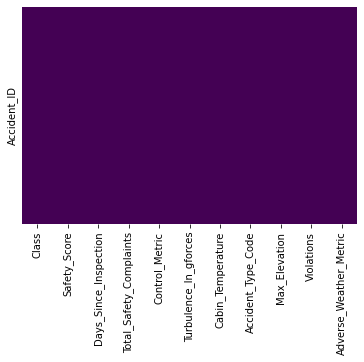

In [ ]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Observation:

- As we seen above there is no null value or missing value is present in the data.
- As we seen in the above plot there is only one color that means there is no missing value.
- if there is missing is present inside the data then above heat map shows other color also which is missing values.

In [ ]:
df.describe().T

count          mean  ...           75%           max
Safety_Score             10000.0     41.876406  ...     52.511416    100.000000
Days_Since_Inspection    10000.0     12.931100  ...     15.000000     23.000000
Total_Safety_Complaints  10000.0      6.564300  ...      9.000000     54.000000
Control_Metric           10000.0     65.145324  ...     73.336372    100.000000
Turbulence_In_gforces    10000.0      0.381495  ...      0.451346      0.882648
Cabin_Temperature        10000.0     79.969331  ...     81.560000     97.510000
Accident_Type_Code       10000.0      3.814900  ...      5.000000      7.000000
Max_Elevation            10000.0  32001.803282  ...  38380.641513  64297.651218
Violations               10000.0      2.012200  ...      3.000000      5.000000
Adverse_Weather_Metric   10000.0      0.255635  ...      0.354059      2.365378

[10 rows x 8 columns]

# Analyzing the Numerical Feature by PDF & checking Outlier:

###a)- Safety_Score:

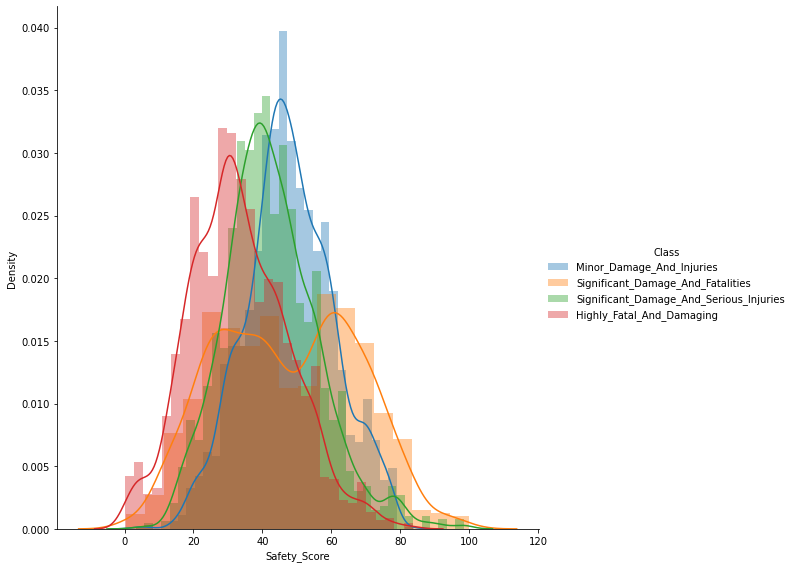

In [ ]:
sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Safety_Score") \
   .add_legend();
plt.show();

OBSERVATION : 
- As we seen we get the All the class have the differnt mean.
- The 'Significants damage and fatalities' have the different shape as the other having the gaussian Distribution.
- The data for the classes range between Safety_Score 0 to 100

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Safety_Score')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the safety_Scores.
- In the significant_Damage_And_fatalty severity thier is no outlier is present inside the data.

###b)- Total_safety_complaints:

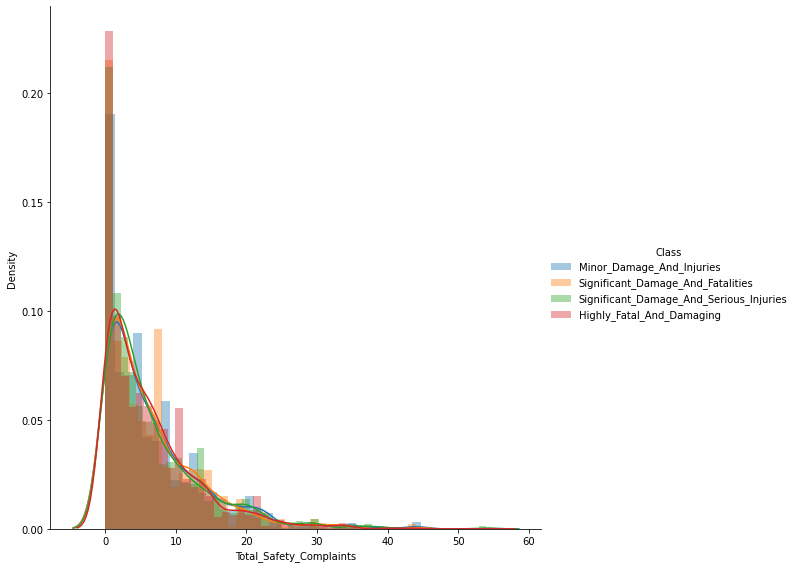

In [ ]:

sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Total_Safety_Complaints") \
   .add_legend();
plt.show();

OBSERVATION : 

- When the number of Total Safety Complaint is roughly between 0-1 ,Highly_Fatal_And_Damaging is maximum. 
- Then the Accident rate is gradually declining.

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Total_Safety_Complaints')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Total_safety_compaints..
- on all the severity categories there are iutlier is present inside the data.

###c)- Control_Metric:

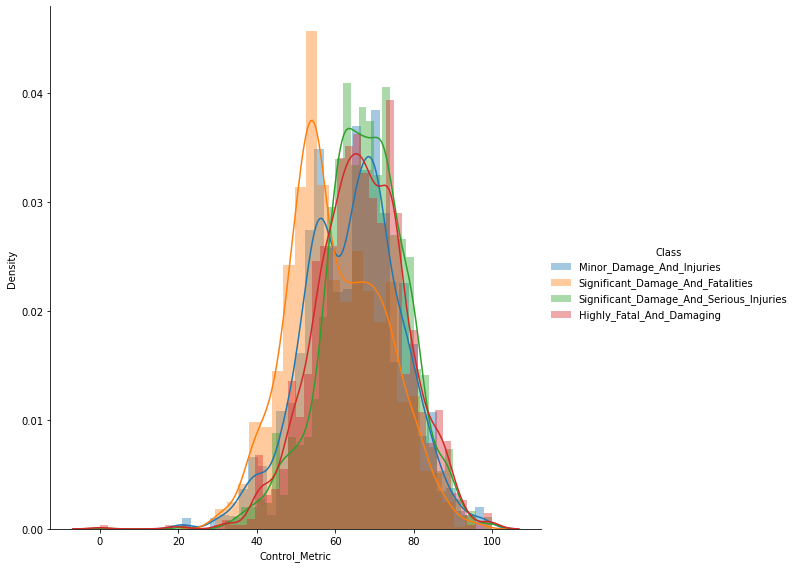

In [ ]:
sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Control_Metric") \
   .add_legend();
plt.show();

OBSERVATION :
- As we seen we get that no one class having the same mean.
- All the classes don't have the gaussian distribution.
- All classes are overlapping each other.
- The data for the classes range between Control Metric 0 to 100

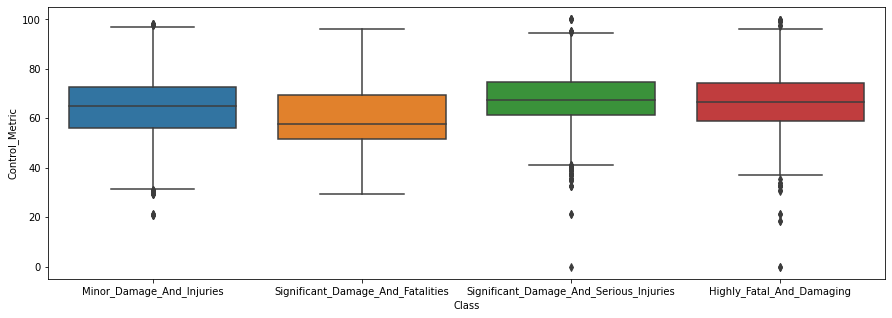

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Control_Metric')

###d)- Turbulance_In_Gforce:

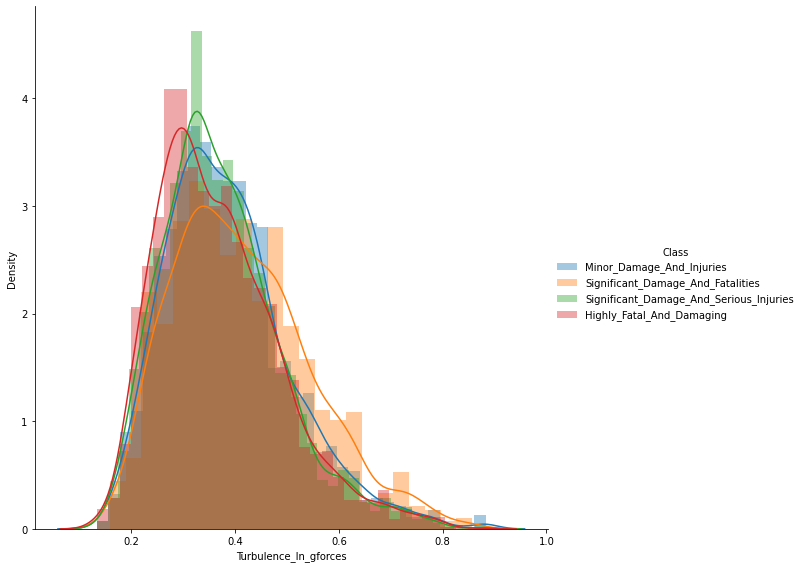

In [ ]:
sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Turbulence_In_gforces") \
   .add_legend();
plt.show();

OBSERVATION :
- As we seen we get that Significant_Damage_And_Serious_Injuries and Significant_Damage_And_Fatalities and minor damage injuries have the same mean.
- Highly_Fatal_And_Damaging have not the same mean..
- All classes are maximum overlapping each other.
- The data for the classes range between Turbulance In Gforce 0 to 1.0

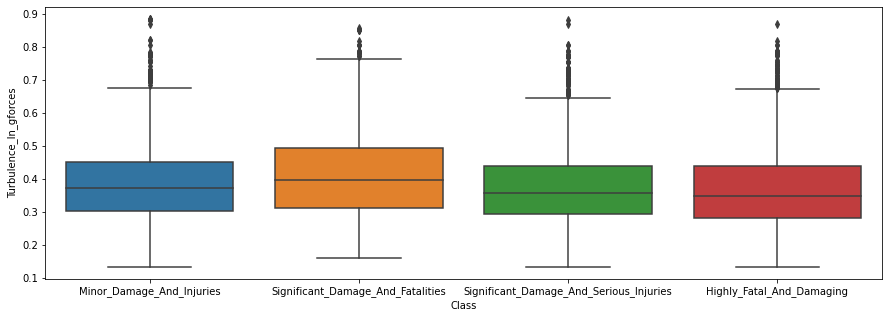

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Turbulence_In_gforces')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Turbulance_in_Gforce.
- on all the severity categories there are iutlier is present inside the data.

###e)- Cabin_Temprature:

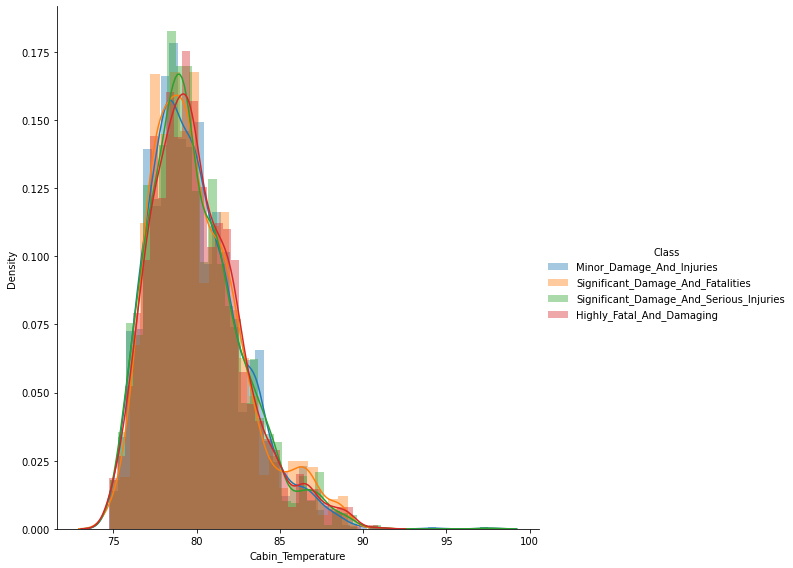

In [ ]:

sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Cabin_Temperature") \
   .add_legend();
plt.show();

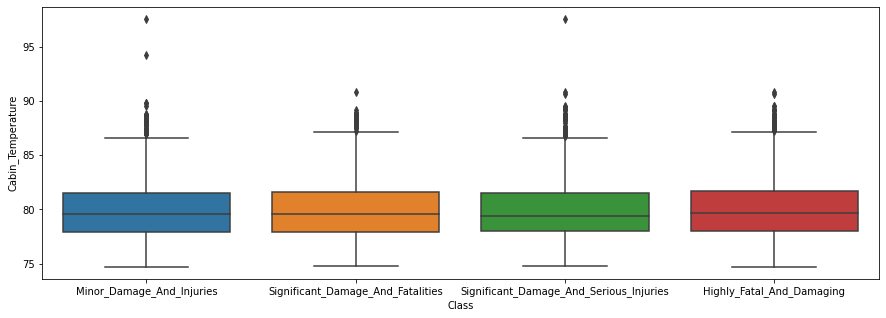

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Cabin_Temperature')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Cabin_temprature.
- on all the severity categories there are iutlier is present inside the data.

###f)- Max_Elevation:

In [ ]:
sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Max_Elevation") \
   .add_legend();
plt.show();

OBSERVATION :
- As we seen we get that Significant_Damage_And_Serious_Injuries and Significant_Damage_And_Fatalities have nearly the same mean.
- Highly_Fatal_And_Damaging have different mean.
- All classes are overlapping each other.
- The data for the classes range between Max_Elevation 0 to 70000

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Max_Elevation')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Max_Elevation.
- on all the severity categories there are iutlier is present inside the data.

###g)- Adverse_Weather_Metric:

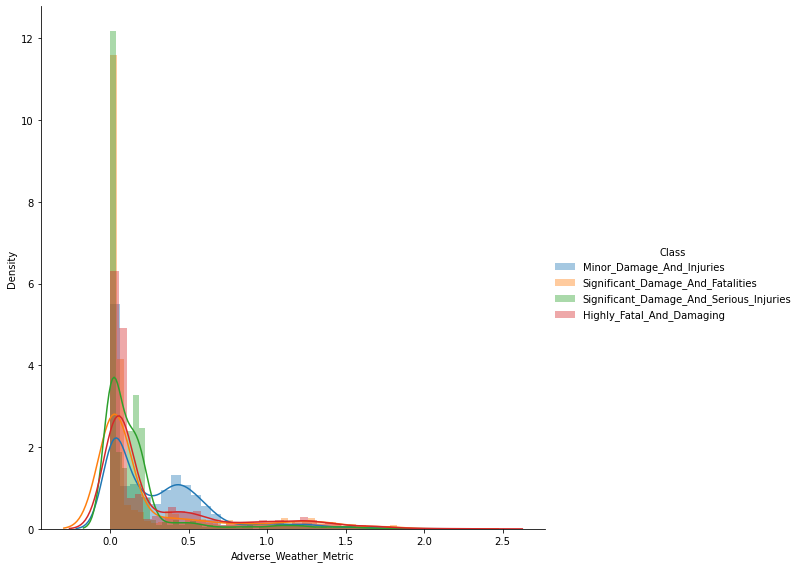

In [ ]:
sns.FacetGrid(df, hue="Class", height=8) \
   .map(sns.distplot, "Adverse_Weather_Metric") \
   .add_legend();
plt.show();

OBSERVATION :
- As we seen we get that When Adverse Weather is 0.1 then the Minor_Damage And injuries occur chances are more.
- Highly_Fatal_And_Damaging have not the gaussian Distribution.
- All classes are overlapping each other.
- The data for the classes range between Adverse Weather Metric 0.0 to 2.5

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Adverse_Weather_Metric')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Adverse_Wether_Metric.
- on all the severity categories there are iutlier is present inside the data.

#Analyzing Categorical Feature and Checking Outlier:

###a)- Days_since_inspection:

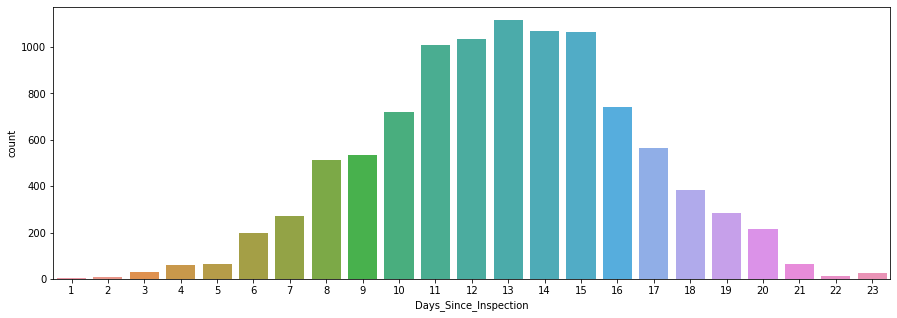

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Days_Since_Inspection')

OBSERVATION :
- As we seen above we get that Days_since inspection range lies between the 1-23.
- we seen that initallay the less number of count but when the days_since inspection increase then  the more number of severity count occur.

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Days_Since_Inspection')

OBSERVATION : 
- As seen above we get that there is number of outlier is present inside the Days_Since_inseption..
- on all the severity categories there are iutlier is present inside the data.

###b)- Accident_Type_Code:

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Accident_Type_Code')

Observation:
- As we seen above we get that accident typ-e code range lies between 1-7.
- when the accident type code is 4 then the more number of count occur.
- when the accident type code is 5 then the less number of count is occur.


In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Accident_Type_Code')

OBSERVATION : 
- As seen above we get that there is no  number of outlier is present inside the Accident_Type_code.


###c)- Violations:

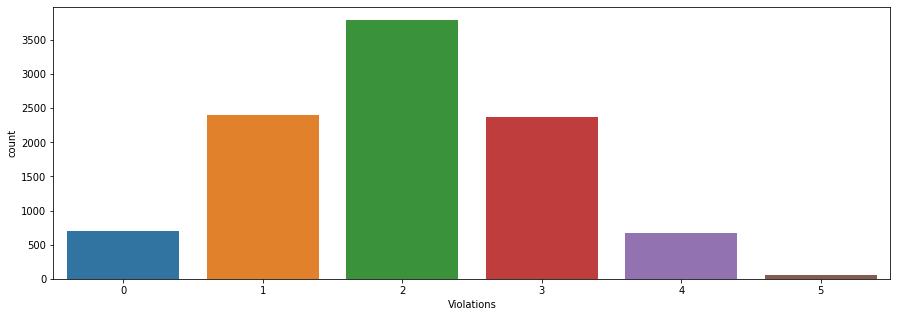

In [ ]:
plt.figure(figsize=(15,5))
sns.countplot(data=df, x='Violations')

OBSERVATION :
- mas we seen above we get that violation range lies between 0-5.
- As we seen above we get that number of counts is more when the violation is 2.
- number of counts is less when the violations is 5

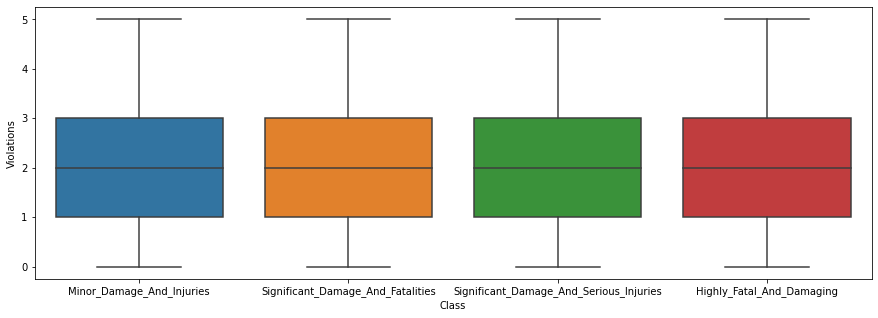

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df,x = 'Class', y = 'Violations')

OBSERVATION : 
- As seen above we get that there is no outlier is present in thye violation.

## Pair Plot :

In [ ]:
sns.set_style("darkgrid")
sns.pairplot(df,hue="class",palette='flag',height=4)#palette is used for colour 
plt.show()

OBSERVATION : 
    
- BY looking above we can't easily find the category of Class.

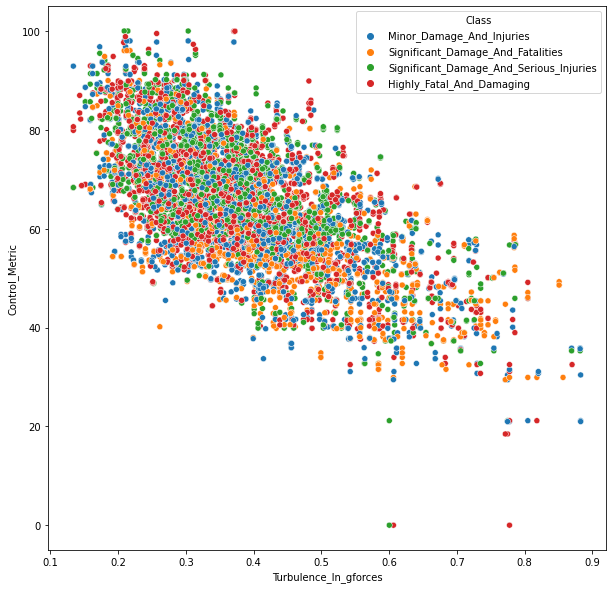

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Turbulence_In_gforces", y="Control_Metric", hue="Class",data=df)

OBSERVATION :
- By looking above we get that there is a inter relation between the turbulance_in_gforce and the control_mteric.
- when turbulance_in_gforce increase then the controol_metric is decraeses.  
- by looking above graph we get that more point are overlapping so we can't get idea by just seeing it


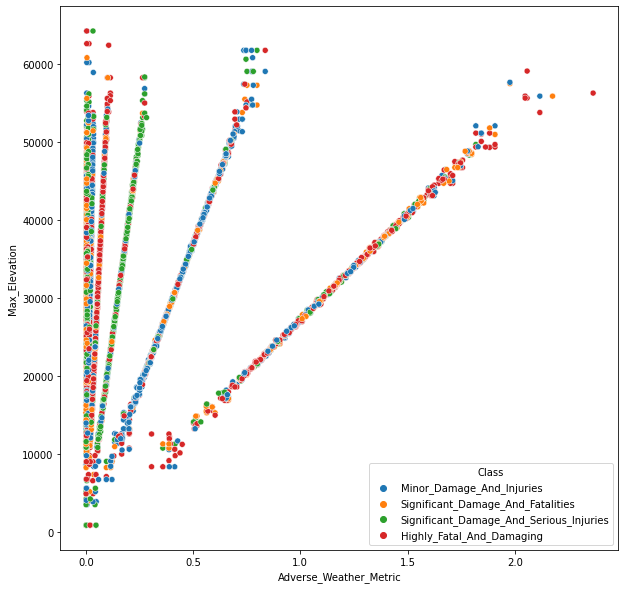

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Adverse_Weather_Metric", y="Max_Elevation", hue="Class",data=df)

OBSERVATION :

- In the left side we can see that when adverse_weather_metric is 0.0 then maximum elevation occurs.   

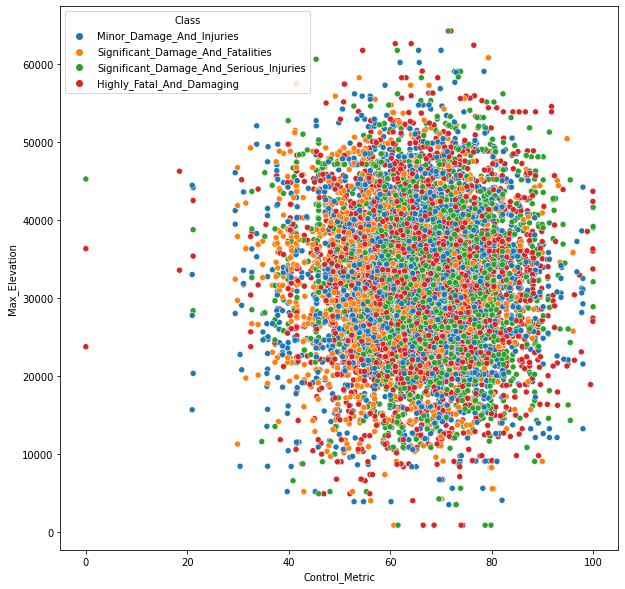

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Control_Metric", y="Max_Elevation", hue="Class",data=df)

OBSERVATION :
    
- by looking above graph we get that more point are overlapping so we can't get idea by just seeing it

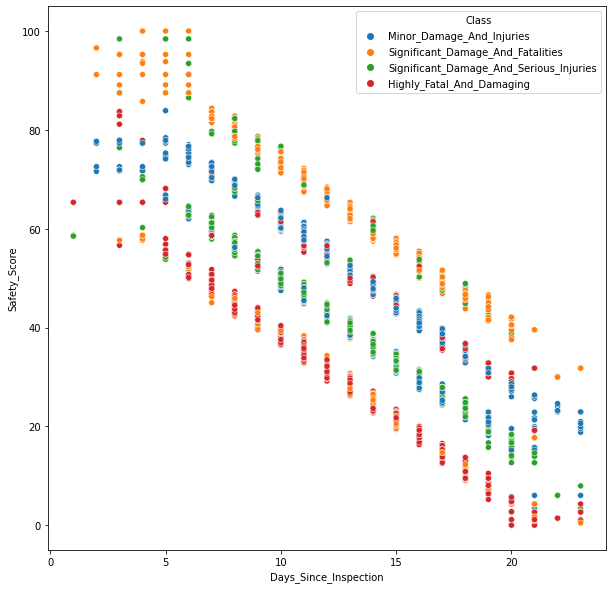

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="Days_Since_Inspection", y="Safety_Score", hue="Class",data=df)

OBSERVATION :
- By looking above we can get that there is inter corelation between the Safety score and days_since_inspection.    
- when the days_since _inspection is incraese then the safety socre is decraeses.

#Corelation Matrix:

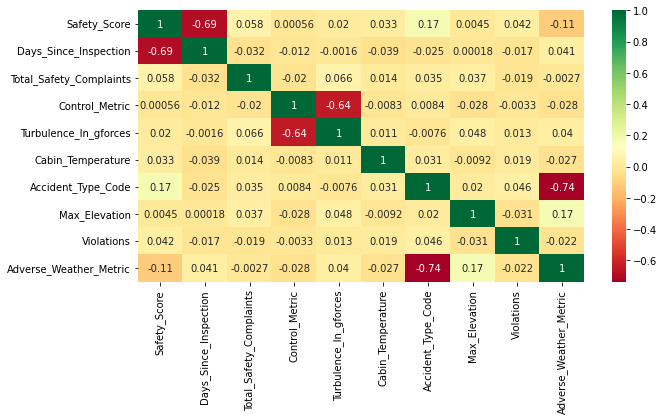

In [ ]:
corr_matrix = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True,cmap="RdYlGn")

Observation:

- The Value range of Corelation matrix is between -1 to 1.
- By looking above heatmap we get the DarkRed color indicate that the variable are highly not corelated with each other,example Safety_Score and Days_Since_inspection they are not corelated with other that why it's matching square comes under the Dark red.

- Dark Green Color indicate that they are highly corelated with each other and their values is 1.

- Adverse weather metric have the highly negative related with the Accident data type that's why it's shows in the dark red one box and other also like this which is highly negative corelated with like days since inpection and the safety score.

#Label Encoding of Target Variable:

In [ ]:
df['Class'].unique()

array(['Minor_Damage_And_Injuries', 'Significant_Damage_And_Fatalities',
       'Significant_Damage_And_Serious_Injuries',
       'Highly_Fatal_And_Damaging'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['Class']=encoder.fit_transform(df['Class'])

In [ ]:
df['Class'].value_counts()

0    3049
3    2729
1    2527
2    1695
Name: Class, dtype: int64

##Removing Outlier:
- By using the Inter Quartile range 

In [ ]:
def outliers(data):
    import numpy as np
    import statistics as sts
    
    for i in data.describe().columns:
        x=np.array(data[i])
        p=[]
        Q1=data[i].quantile(0.25)
        Q3=data[i].quantile(0.75)
        IQR=Q3-Q1
        
        LTV=Q1-(1.5*IQR)
        UTV=Q3+ (1.5*IQR)
        
        for j in x:
            if j<= LTV or j>= UTV:
                p.append(sts.median(x))
            else:
                p.append(j)
                
        data[i]=p
        
    return data

In [ ]:
outliers(df)

Class  ...  Adverse_Weather_Metric
Accident_ID                                           ...                        
7570                       Minor_Damage_And_Injuries  ...                0.424352
12128                      Minor_Damage_And_Injuries  ...                0.352350
2181               Significant_Damage_And_Fatalities  ...                0.003364
5946         Significant_Damage_And_Serious_Injuries  ...                0.211728
9054               Significant_Damage_And_Fatalities  ...                0.176883
...                                              ...  ...                     ...
11493        Significant_Damage_And_Serious_Injuries  ...                0.026150
305                        Highly_Fatal_And_Damaging  ...                0.074898
612          Significant_Damage_And_Serious_Injuries  ...                0.168173
4963                       Minor_Damage_And_Injuries  ...                0.026381
9387                       Highly_Fatal_And_Damaging  ...                0.017036

[10000 rows x 11 columns]

In [ ]:
#Now save the Dataframe into the Final preprocessed_data file.
df.to_csv("/content/drive/MyDrive/Case study/preprocessed_data.csv")